In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def similarity_nominal(p, q):
    return int(p == q)

In [4]:
similarity_nominal('Petar', 'Jovan')

0

In [5]:
similarity_nominal('petar', 'petar')

1

In [6]:
def dissimilarity_nominal(p, q):
    return 1 - similarity_nominal(p, q)

In [7]:
dissimilarity_nominal('Petar', 'Jovan')

1

In [8]:
dissimilarity_nominal('Petar', 'Petar')

0

In [9]:
def dissimilarity_ordinal(p, q, values):
    n = len(values)
    map_values = pd.Series(range(n), index=values)
    
    return abs(map_values[p] - map_values[q])/(n-1)

In [10]:
dissimilarity_ordinal('M', 'XL', ['S', 'M', 'L', 'XL'])

0.6666666666666666

In [11]:
dissimilarity_ordinal('S', 'XL', ['S', 'M', 'L', 'XL'])

1.0

In [12]:
def similarity_ordinal(p, q, values):
    return 1 - dissimilarity_ordinal(p, q, values)

In [13]:
similarity_ordinal('M', 'XL', ['S', 'M', 'L', 'XL'])

0.33333333333333337

In [14]:
similarity_ordinal('S', 'XL', ['S', 'M', 'L', 'XL'])

0.0

In [15]:
def dissimilarity_quantity(p, q):
    return abs(p - q)

In [16]:
import datetime

In [17]:
dissimilarity_quantity(datetime.date(2020, 3, 25), datetime.date(2020, 7, 24))

datetime.timedelta(days=121)

In [18]:
def similarity_quantity_1(p, q):
    return -dissimilarity_quantity(p, q)

In [19]:
similarity_quantity_1(datetime.date(2020, 3, 25), datetime.date(2020, 7, 24))

datetime.timedelta(days=-121)

In [20]:
def similarity_quantity_2(p, q):
    return 1/(1 + dissimilarity_quantity(p, q).days)

In [21]:
def minkowski(x, y, r):
    if r <= 0:
        raise ValueError("R is not positive")
        
    return (sum([abs(x[v] - y[v])**r for v in x.index]))**(1/r)

In [22]:
points = pd.DataFrame([[0,2], [2,0], [3,1], [5,1]], index=['p1', 'p2', 'p3', 'p4'], columns=['x', 'y'])

In [23]:
points

,x,y
p1,0,2
p2,2,0
p3,3,1
p4,5,1


Text(0.5, 1.0, 'Points')

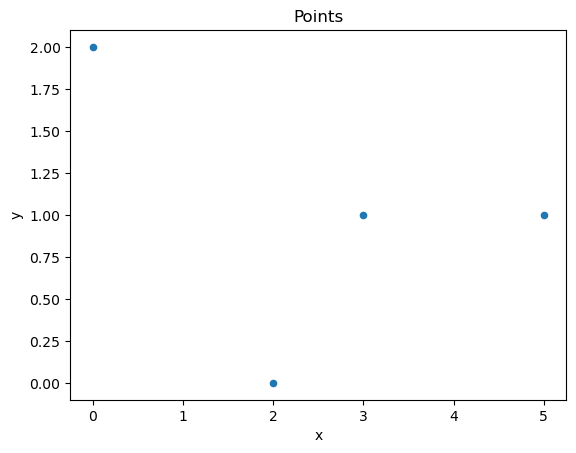

In [24]:
points.plot.scatter('x', 'y')
plt.title('Points')

In [25]:
def L1(points):
    L1 = pd.DataFrame(0, index=points.index, columns=points.index)
    
    for p1 in points.index:
        for p2 in points.index:
            L1[p1][p2] = minkowski(points.loc[p1], points.loc[p2], 1)
            
    return L1

In [26]:
L1(points)

,p1,p2,p3,p4
p1,0,4,4,6
p2,4,0,2,4
p3,4,2,0,2
p4,6,4,2,0


In [27]:
def L2(points):
    l2 = pd.DataFrame(0, index=points.index, columns=points.index)
    
    for p1 in points.index:
        for p2 in points.index:
            l2[p1][p2] = minkowski(points.loc[p1], points.loc[p2], 2)
            
    return l2

In [28]:
L2(points)

/tmp/ipykernel_9750/4131243763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l2[p1][p2] = minkowski(points.loc[p1], points.loc[p2], 2)


,p1,p2,p3,p4
p1,0.000000,2.828427,3.162278,5.099020
p2,2.828427,0.000000,1.414214,3.162278
p3,3.162278,1.414214,0.000000,2.000000
p4,5.099020,3.162278,2.000000,0.000000


In [29]:
def Lmax(points):
    lmax = pd.DataFrame(0, index=points.index, columns=points.index, dtype='float64')
    
    for p1 in points.index:
        for p2 in points.index:
            lmax[p1][p2] = max(abs(points.loc[p1] - points.loc[p2]))
            
    return lmax

In [30]:
Lmax(points)

,p1,p2,p3,p4
p1,0.0,2.0,3.0,5.0
p2,2.0,0.0,1.0,3.0
p3,3.0,1.0,0.0,2.0
p4,5.0,3.0,2.0,0.0


In [31]:
def hammings_distance(p, q):
    return (p == q).sum()

In [32]:
p = pd.Series([0, 1, 0, 1, 0, 1, 0, 0, 0, 1])
q = pd.Series([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [33]:
hammings_distance(p, q)

7

In [34]:
def smc(p, q):
    return (p == q).sum()/p.count()

In [35]:
p = pd.Series([0, 1, 1, 0, 1, 0])
q = pd.Series([1, 0, 1, 0, 1, 0])

In [36]:
smc(p, q)

0.6666666666666666

In [37]:
def jacard(p, q):
    return (p+q == 2).sum()/(p+q != 0).sum()

In [38]:
p = pd.Series([0, 1, 0, 1, 0, 1, 0, 0, 0, 1])
q = pd.Series([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [39]:
jacard(p, q)

0.4

In [40]:
def norm(x):
    return np.sqrt((x*x).sum())

In [41]:
def cosine_similarity(p, q):
    return (p*q).sum()/(norm(p) * norm(q))

In [42]:
cosine_similarity(p, q)

0.5773502691896258

In [43]:
def correlation(p, q):
    return (np.cov(p, q)/(p.std() * q.std()))[0][1]